In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data from output_labels.csv
csv_path = 'D:\\Semester 7\\FYP\\preprocessing\\output_labels.csv'
df = pd.read_csv(csv_path)

# Extract file paths and class labels
file_paths = df['Path'].values
class_labels = df['Class'].values

In [3]:
# Load ECG data from file paths and extract features
ecg_features = []
for path in file_paths:
    # Load ECG data from CSV file
    ecg_df = pd.read_csv(path)
    # Assuming your ECG data is in columns I, II, III, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6
    ecg_values = ecg_df[['I', 'II', 'III', 'AVR', 'AVL',
                         'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']].values
    # Extract features from the ECG data (e.g., mean, standard deviation, etc.)
    ecg_mean = np.mean(ecg_values, axis=0)
    ecg_std = np.std(ecg_values, axis=0)
    # Concatenate features
    ecg_features.append(np.concatenate([ecg_mean, ecg_std]))

X = np.array(ecg_features)
y = np.array(class_labels)

# Optionally, scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Decode the predicted labels if needed
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.444
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.38      0.41       196
           1       0.54      0.64      0.58       224
           2       0.34      0.33      0.34       186
           3       0.47      0.59      0.52       202
           4       0.34      0.23      0.28       192

    accuracy                           0.44      1000
   macro avg       0.43      0.44      0.43      1000
weighted avg       0.43      0.44      0.43      1000



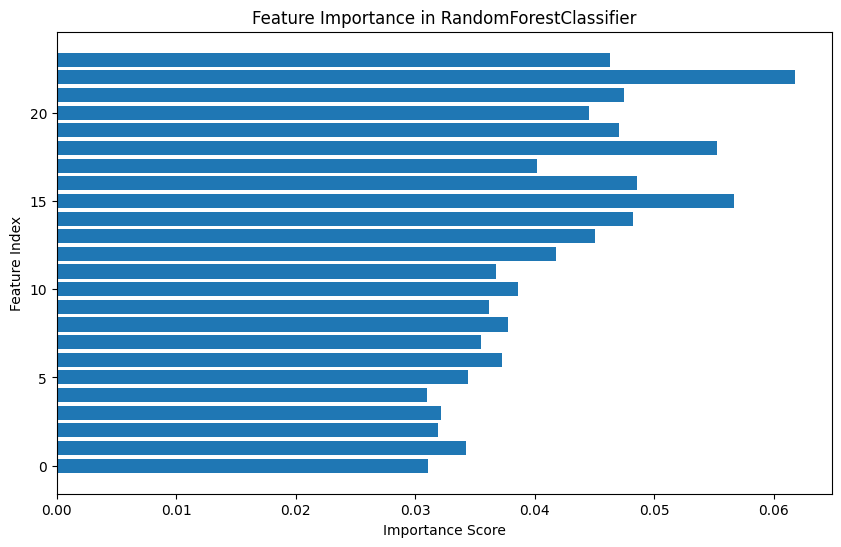

Sorted Feature Importance:
    Feature Index  Importance
22             22    0.061792
15             15    0.056646
18             18    0.055296
16             16    0.048525
14             14    0.048252
21             21    0.047495
19             19    0.047075
23             23    0.046287
13             13    0.045026
20             20    0.044567
12             12    0.041806
17             17    0.040221
10             10    0.038633
8               8    0.037801
6               6    0.037266
11             11    0.036743
9               9    0.036201
7               7    0.035529
5               5    0.034429
1               1    0.034268
3               3    0.032174
2               2    0.031866
0               0    0.031106
4               4    0.030996


In [6]:
import matplotlib.pyplot as plt

# Get feature importance scores from the trained model
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature Index': range(len(feature_importance)), 'Importance': feature_importance})

# Sort features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature Index'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature Index')
plt.title('Feature Importance in RandomForestClassifier')
plt.show()

# Display the sorted feature importance DataFrame
print("Sorted Feature Importance:")
print(feature_importance_df)


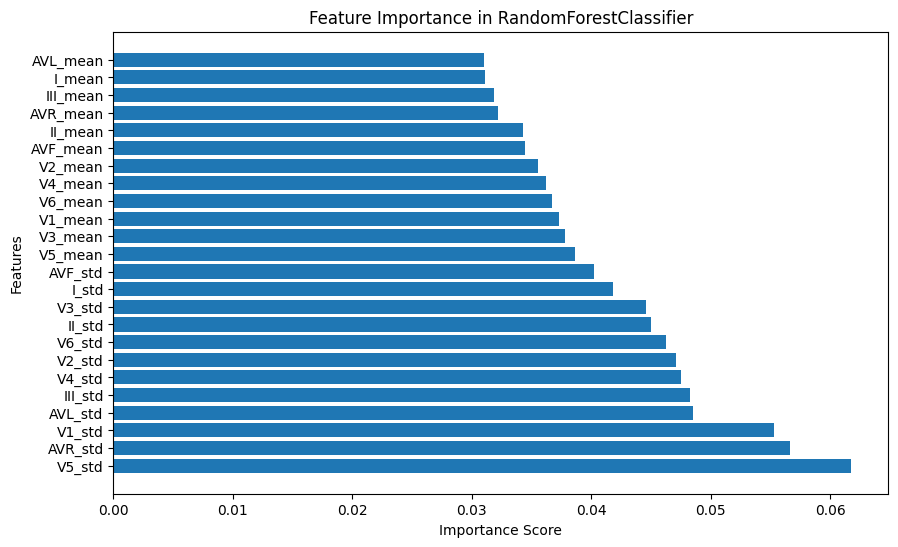

Sorted Feature Importance:
     Feature  Importance
22    V5_std    0.061792
15   AVR_std    0.056646
18    V1_std    0.055296
16   AVL_std    0.048525
14   III_std    0.048252
21    V4_std    0.047495
19    V2_std    0.047075
23    V6_std    0.046287
13    II_std    0.045026
20    V3_std    0.044567
12     I_std    0.041806
17   AVF_std    0.040221
10   V5_mean    0.038633
8    V3_mean    0.037801
6    V1_mean    0.037266
11   V6_mean    0.036743
9    V4_mean    0.036201
7    V2_mean    0.035529
5   AVF_mean    0.034429
1    II_mean    0.034268
3   AVR_mean    0.032174
2   III_mean    0.031866
0     I_mean    0.031106
4   AVL_mean    0.030996


In [7]:
import matplotlib.pyplot as plt

# Get feature importance scores from the trained model
feature_importance = rf_classifier.feature_importances_

# Get feature names (assuming your feature names are in a list named feature_names)
feature_names = ['I_mean', 'II_mean', 'III_mean', 'AVR_mean', 'AVL_mean', 'AVF_mean',
                 'V1_mean', 'V2_mean', 'V3_mean', 'V4_mean', 'V5_mean', 'V6_mean',
                 'I_std', 'II_std', 'III_std', 'AVR_std', 'AVL_std', 'AVF_std',
                 'V1_std', 'V2_std', 'V3_std', 'V4_std', 'V5_std', 'V6_std']

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in RandomForestClassifier')
plt.show()

# Display the sorted feature importance DataFrame
print("Sorted Feature Importance:")
print(feature_importance_df)
